In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("bank.csv")


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.shape

(11162, 17)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
pd.isnull(df).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df.balance.unique().__len__()


3805

In [10]:
df.age.unique()


array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

In [11]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())
    

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [12]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

if features_na:
    for feature in features_na:
        print(feature, np.round(df[feature].isnull().mean() * 100, 4), '% missing values')
else:
    print('No missing values found')


No missing values found


In [13]:
for column in df.columns:
    print(column, df[column].nunique())


age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [14]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [15]:
categorical_features = [feature for feature in df.columns if (df[feature].dtype == 'O') and (feature not in ['y'])]
categorical_features


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [16]:
for feature in categorical_features:
  print('the feature is {} and the number of categories are {}'.format(feature,len(df[feature].unique())))

the feature is job and the number of categories are 12
the feature is marital and the number of categories are 3
the feature is education and the number of categories are 4
the feature is default and the number of categories are 2
the feature is housing and the number of categories are 2
the feature is loan and the number of categories are 2
the feature is contact and the number of categories are 3
the feature is month and the number of categories are 12
the feature is poutcome and the number of categories are 4
the feature is deposit and the number of categories are 2


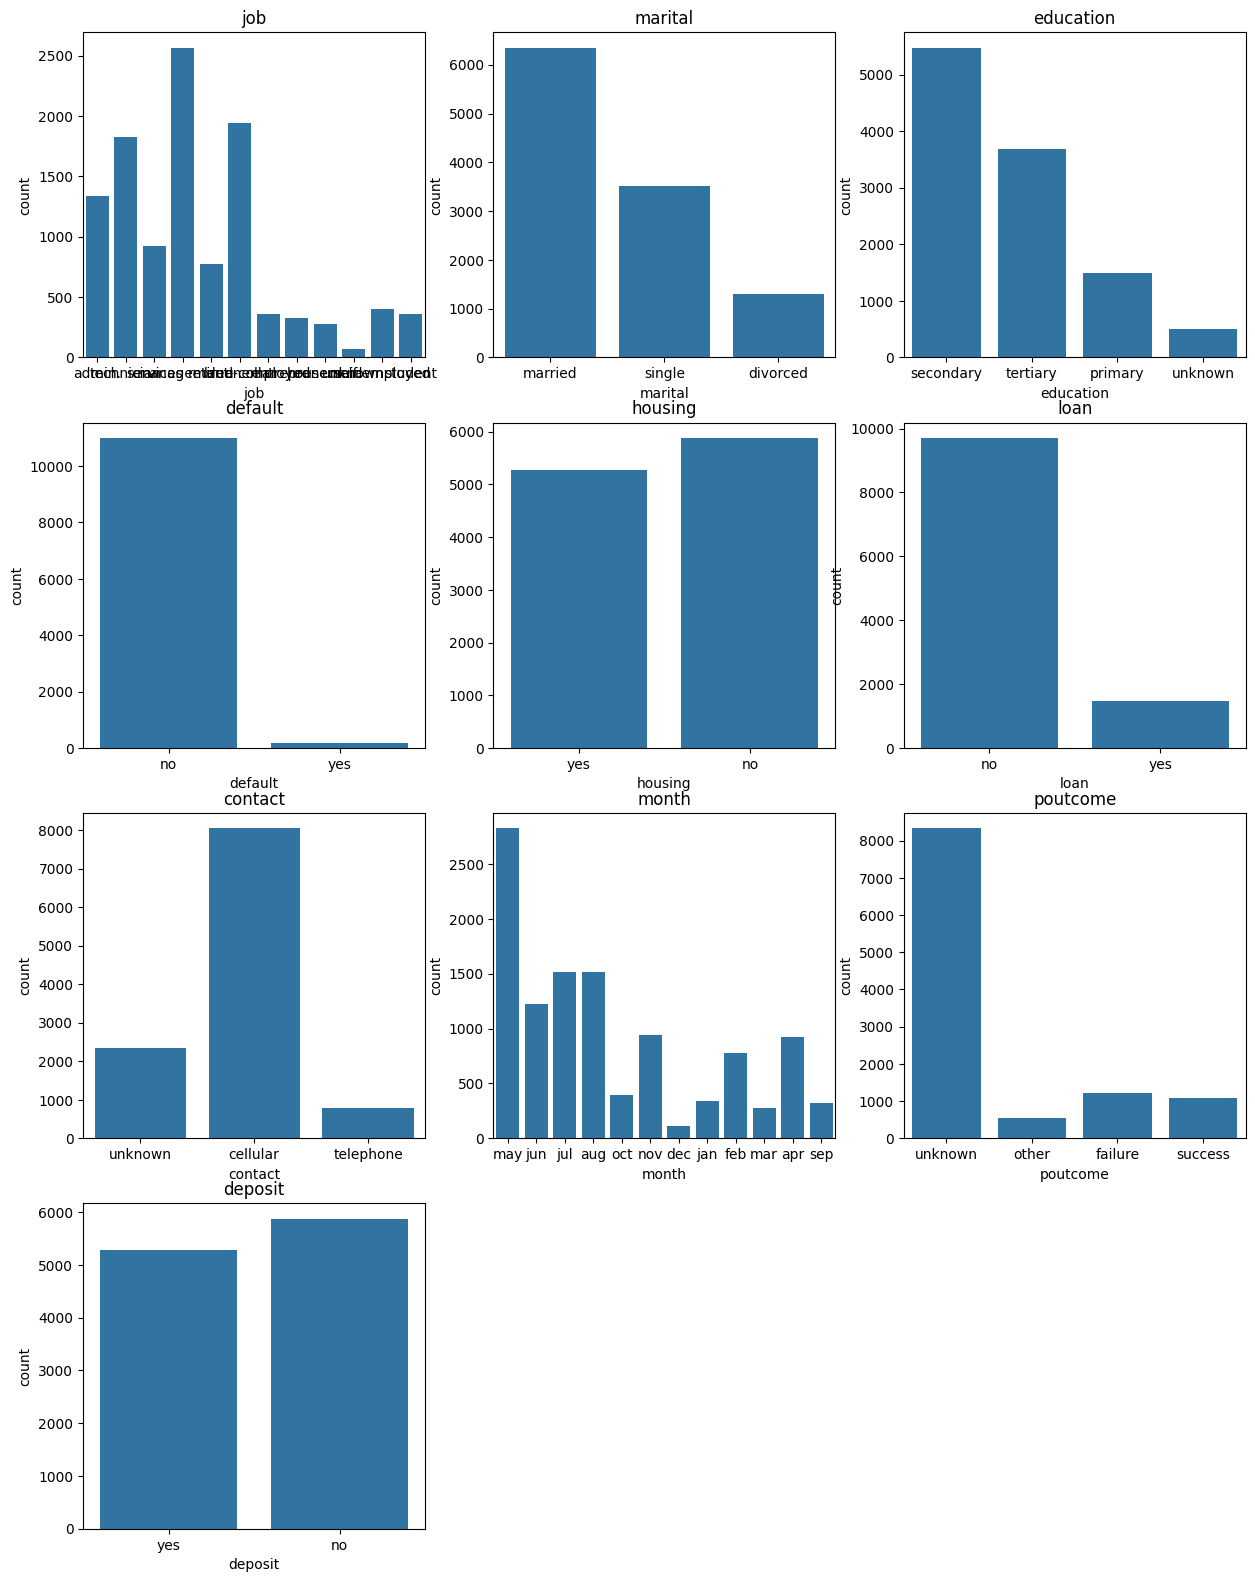

In [17]:
plt.figure(figsize=(15, 60), facecolor='white')

plotnumber = 1

for categorical_feature in categorical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(x=categorical_feature, data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber += 1
plt.show()

In [18]:
df = df.rename(columns={'y': 'deposit'})


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


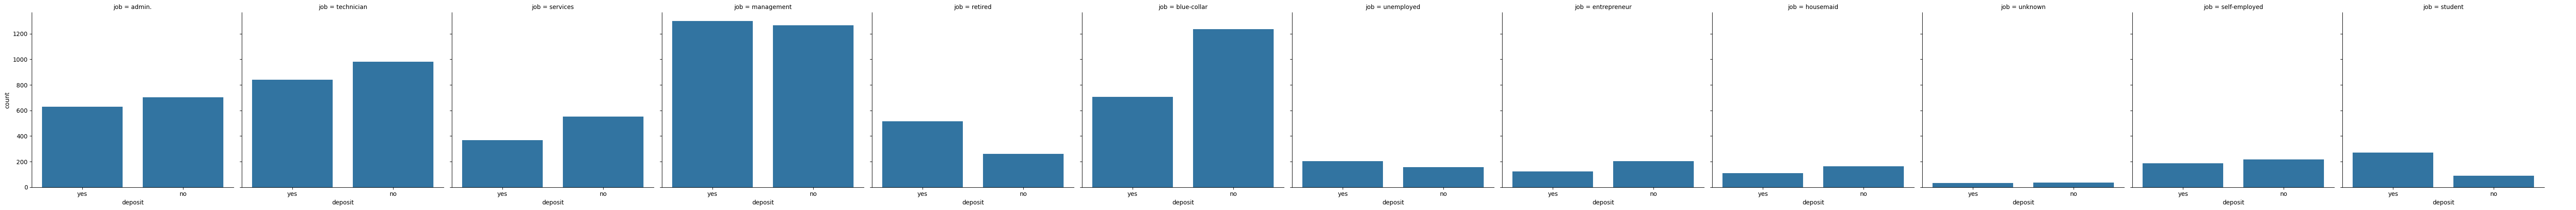

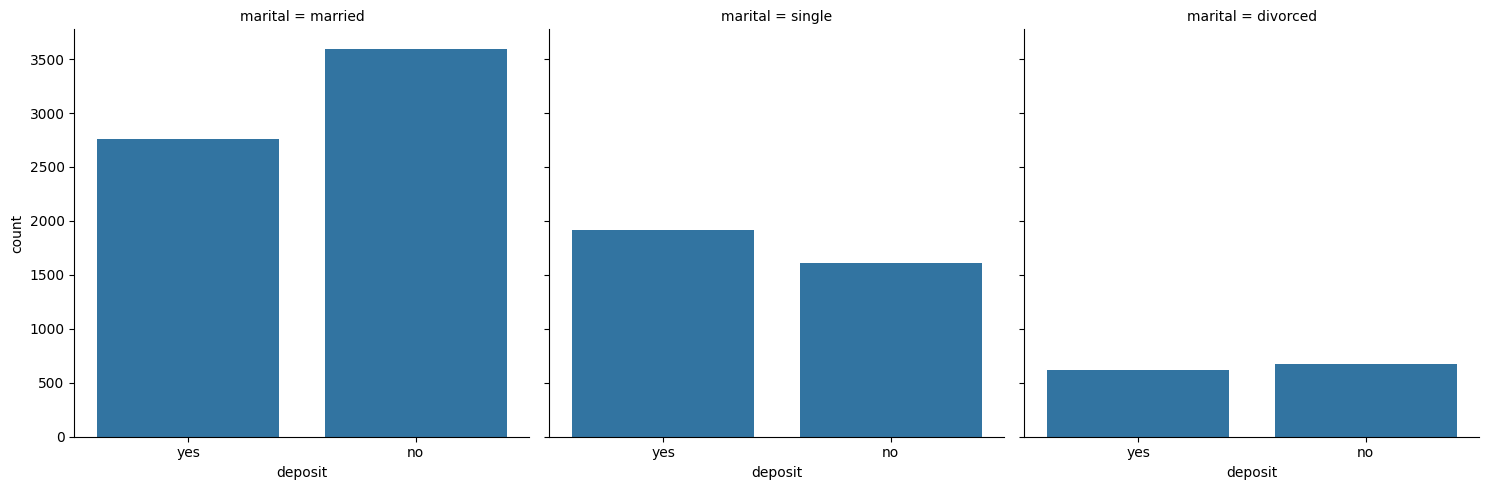

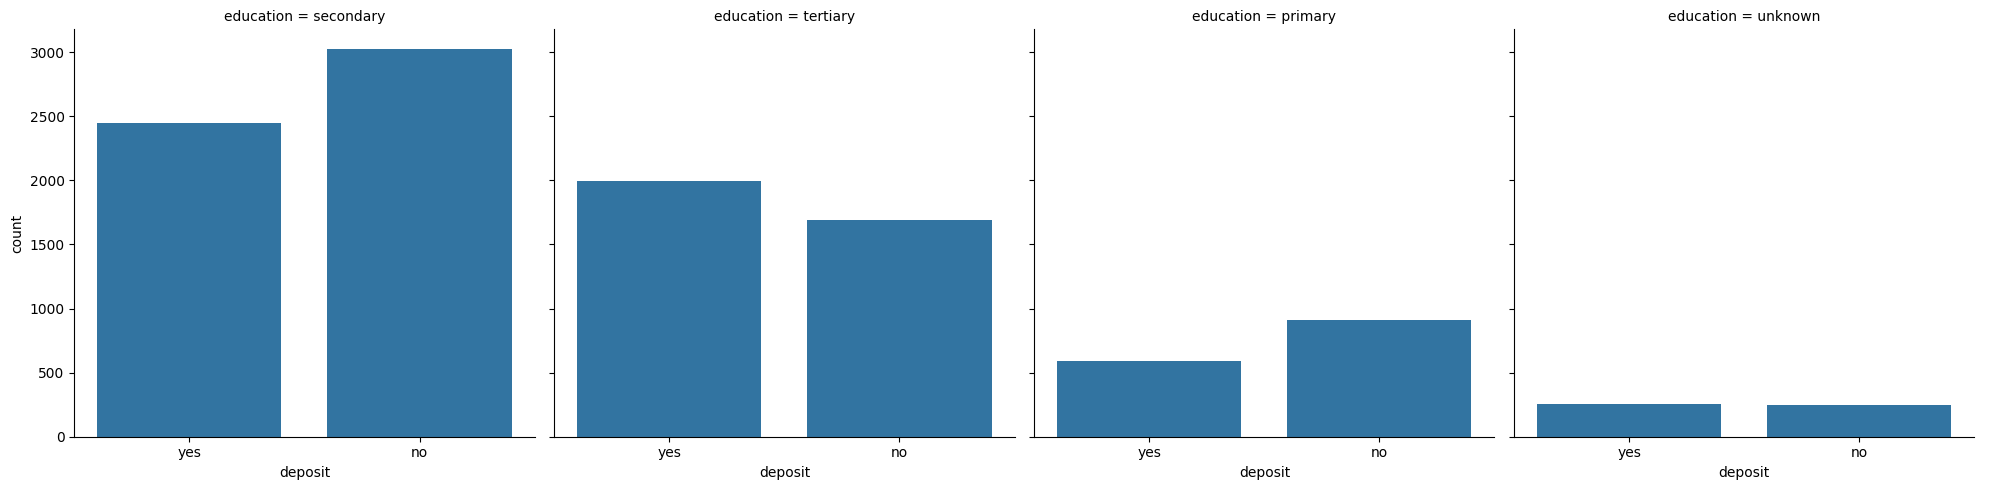

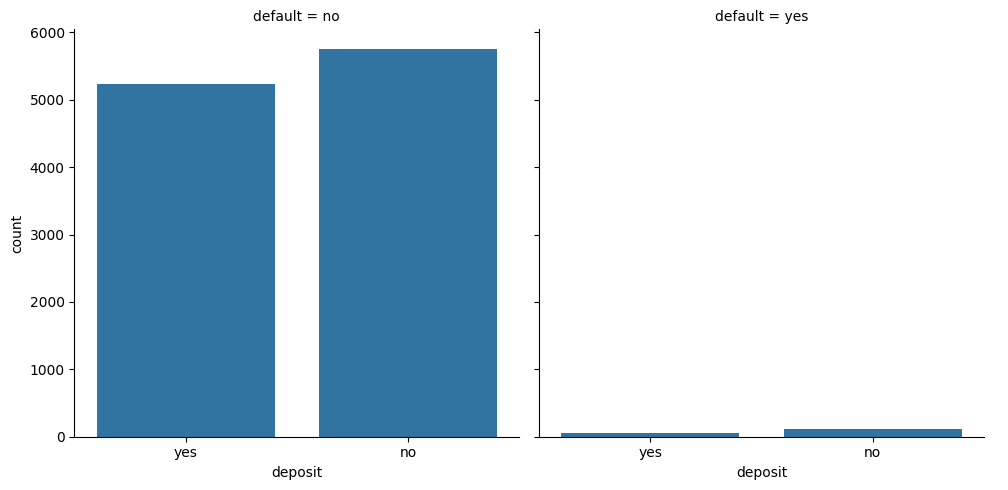

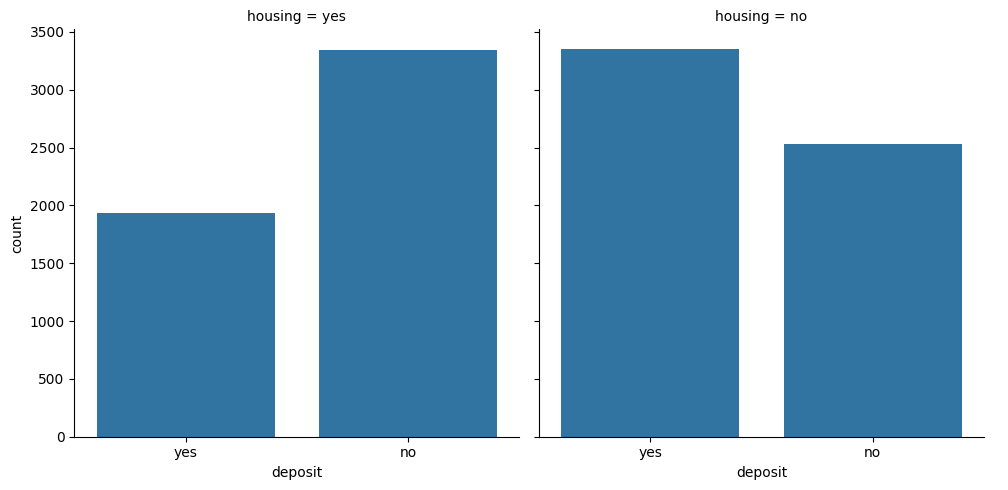

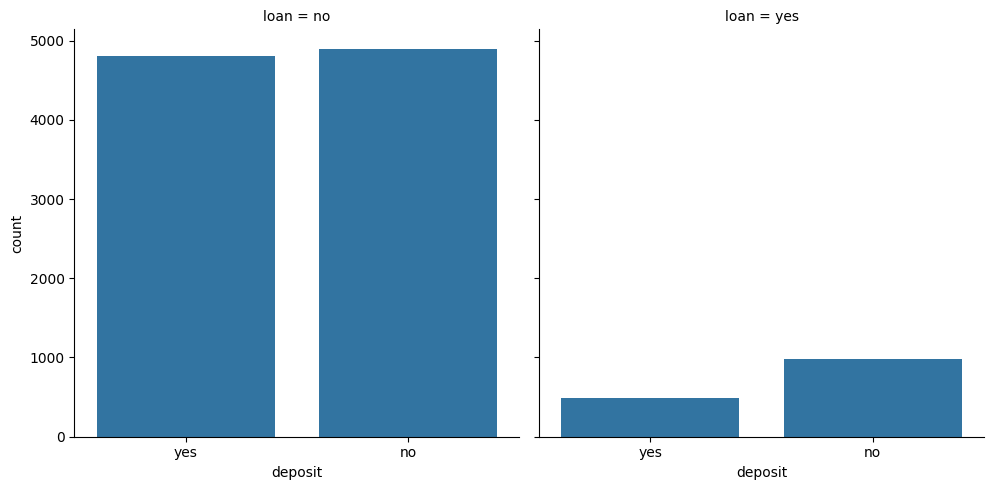

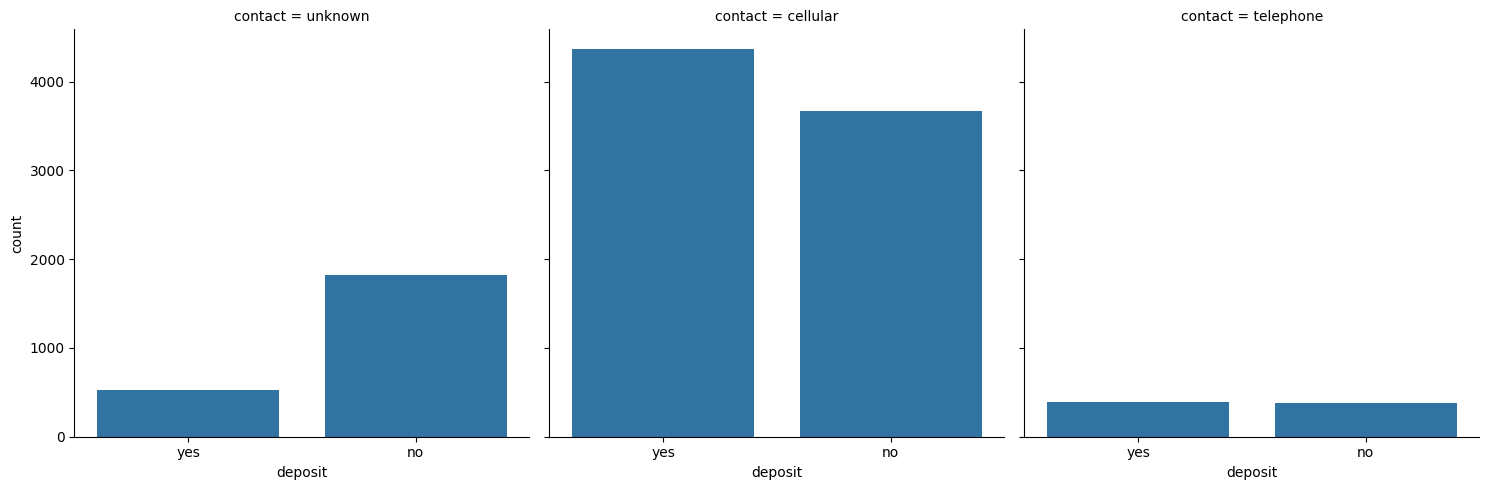

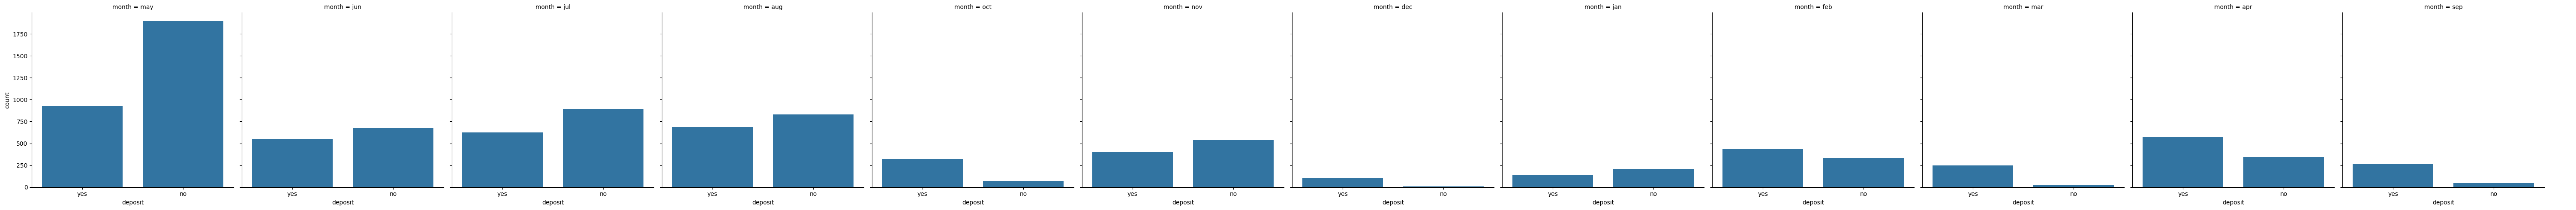

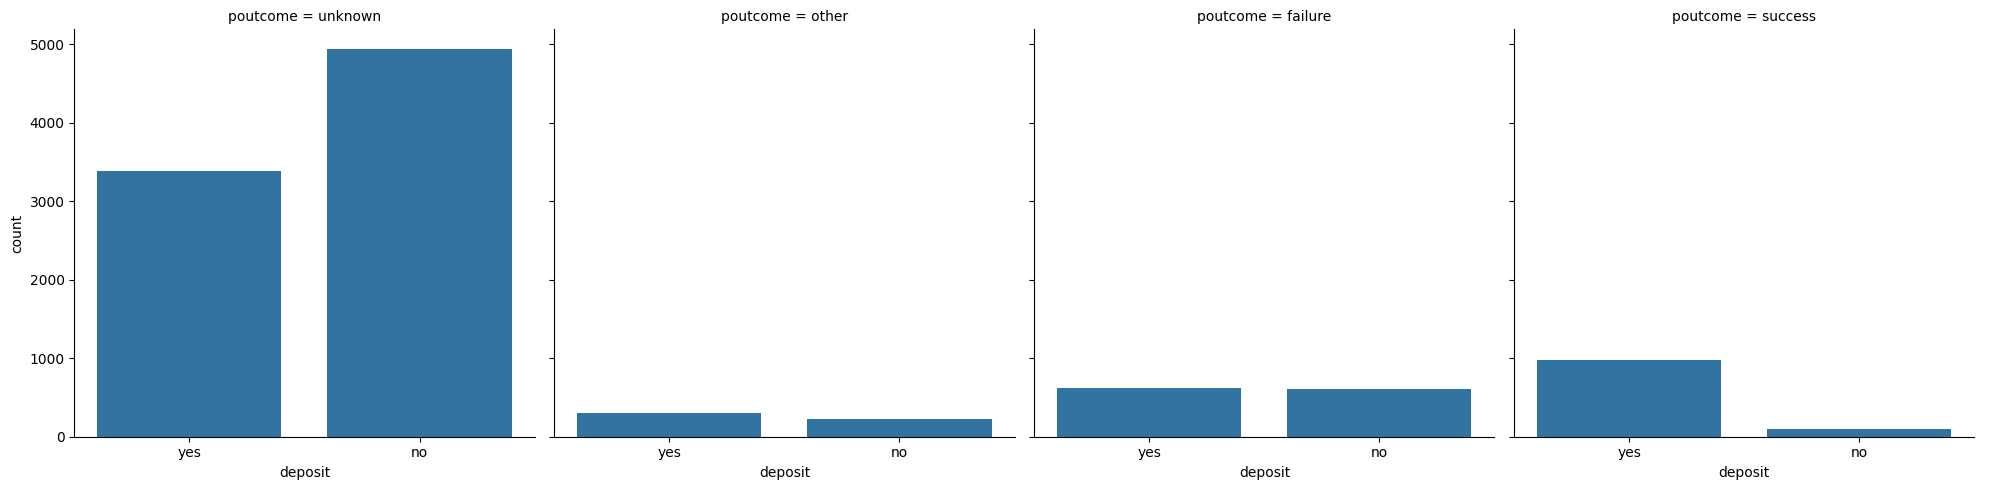

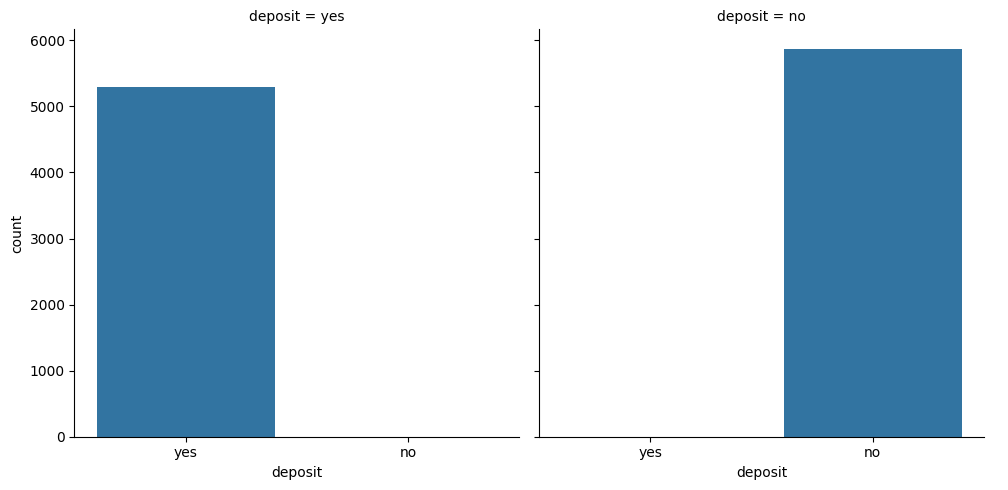

In [20]:
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data=df)
plt.show()


In [21]:
for categorical_feature in categorical_features:
  print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

In [22]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtype != 'O') and (feature != 'deposit'))]
print('Number of numerical variables:', len(numerical_features))
df[numerical_features].head()


Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [23]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique()<25)]
print('discrete  variables count: {}'.format(len(discrete_feature)))

discrete  variables count: 7


In [24]:
continous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print('continous variables count: {}'.format(len(continous_feature)))

continous variables count: 0


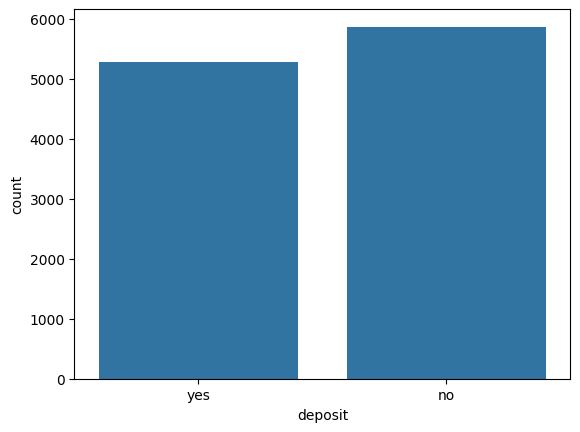

In [25]:
sns.countplot(x='deposit',data=df)
plt.show()

In [26]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [27]:
df2=df.copy()


In [28]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [29]:
df2.groupby(['deposit','default']).size()


deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [30]:
print(df2.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [31]:
df2.groupby(['deposit','pdays']).size()


deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [32]:
df2.groupby('age',sort=True)['age'].count()


age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [33]:
df2.groupby(['deposit','balance'],sort=True)['balance'].count()


deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [34]:
df2.groupby(['deposit','duration'],sort=True)['duration'].count()


deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [35]:
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()


deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [36]:
df3=df2[df2['campaign']<33]


In [37]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()


deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [38]:
df3.groupby(['deposit','previous'],sort=True)['previous'].count()


deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [39]:
df4=df3[df3['previous']<31]


In [40]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# <span style="color:skyblue">Encoding & Scaling</span>

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder = LabelEncoder()
scaler = StandardScaler()

# Identify categorical and numerical columns
categorical_cols = df2.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'Numeric columns:\n{numerical_cols}\nCategorical columns:\n{categorical_cols}')
print("...................................................................")
# Copy the DataFrame
original = df2.copy()

# Encode categorical columns
df2[categorical_cols] = df2[categorical_cols].apply(encoder.fit_transform)

# Display unique encoded values for each categorical column for Data Preprocessing in the Model deployment stage.
for column in categorical_cols:
    unique_encoded_values = df2[column].unique()   
    print(f"Unique encoded values for column '{column}': {original[column].unique()} : {unique_encoded_values}")

# Scale numerical columns
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])


Numeric columns:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
...................................................................
Unique encoded values for column 'job': ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student'] : [ 0  9  7  4  5  1 10  2  3 11  6  8]
Unique encoded values for column 'marital': ['married' 'single' 'divorced'] : [1 2 0]
Unique encoded values for column 'education': ['secondary' 'tertiary' 'primary' 'unknown'] : [1 2 0 3]
Unique encoded values for column 'default': ['no' 'yes'] : [0 1]
Unique encoded values for column 'housing': ['yes' 'no'] : [1 0]
Unique encoded values for column 'loan': ['no' 'yes'] : [0 1]
Unique encoded values for column 'contact': ['unknown' 'cellular' 'telephone'] : [2 0 1]
Unique encoded val

In [42]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,0,1,1,0,0.252525,1,0,2,-1.265746,8,1.930226,-0.554168,-0.481184,-0.363260,3,1
1,1.239676,0,1,1,0,-0.459974,0,0,2,-1.265746,8,3.154612,-0.554168,-0.481184,-0.363260,3,1
2,-0.019470,9,1,1,0,-0.080160,1,0,2,-1.265746,8,2.929901,-0.554168,-0.481184,-0.363260,3,1
3,1.155733,7,1,1,0,0.293762,1,0,2,-1.265746,8,0.596366,-0.554168,-0.481184,-0.363260,3,1
4,1.071790,0,1,2,0,-0.416876,0,0,2,-1.265746,8,0.867171,-0.186785,-0.481184,-0.363260,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,1,2,0,0,-0.473616,1,0,0,0.515650,0,-0.331287,-0.554168,-0.481184,-0.363260,3,0
11158,-0.187357,7,1,1,0,-0.246658,0,0,2,0.040612,6,-0.832564,0.547981,-0.481184,-0.363260,3,0
11159,-0.774958,9,2,1,0,-0.464934,0,0,0,0.396891,1,-0.622258,-0.186785,-0.481184,-0.363260,3,0
11160,0.148416,9,1,1,0,-0.473926,0,1,0,-0.909466,8,-1.045752,-0.186785,1.109571,1.818332,0,0


<Axes: >

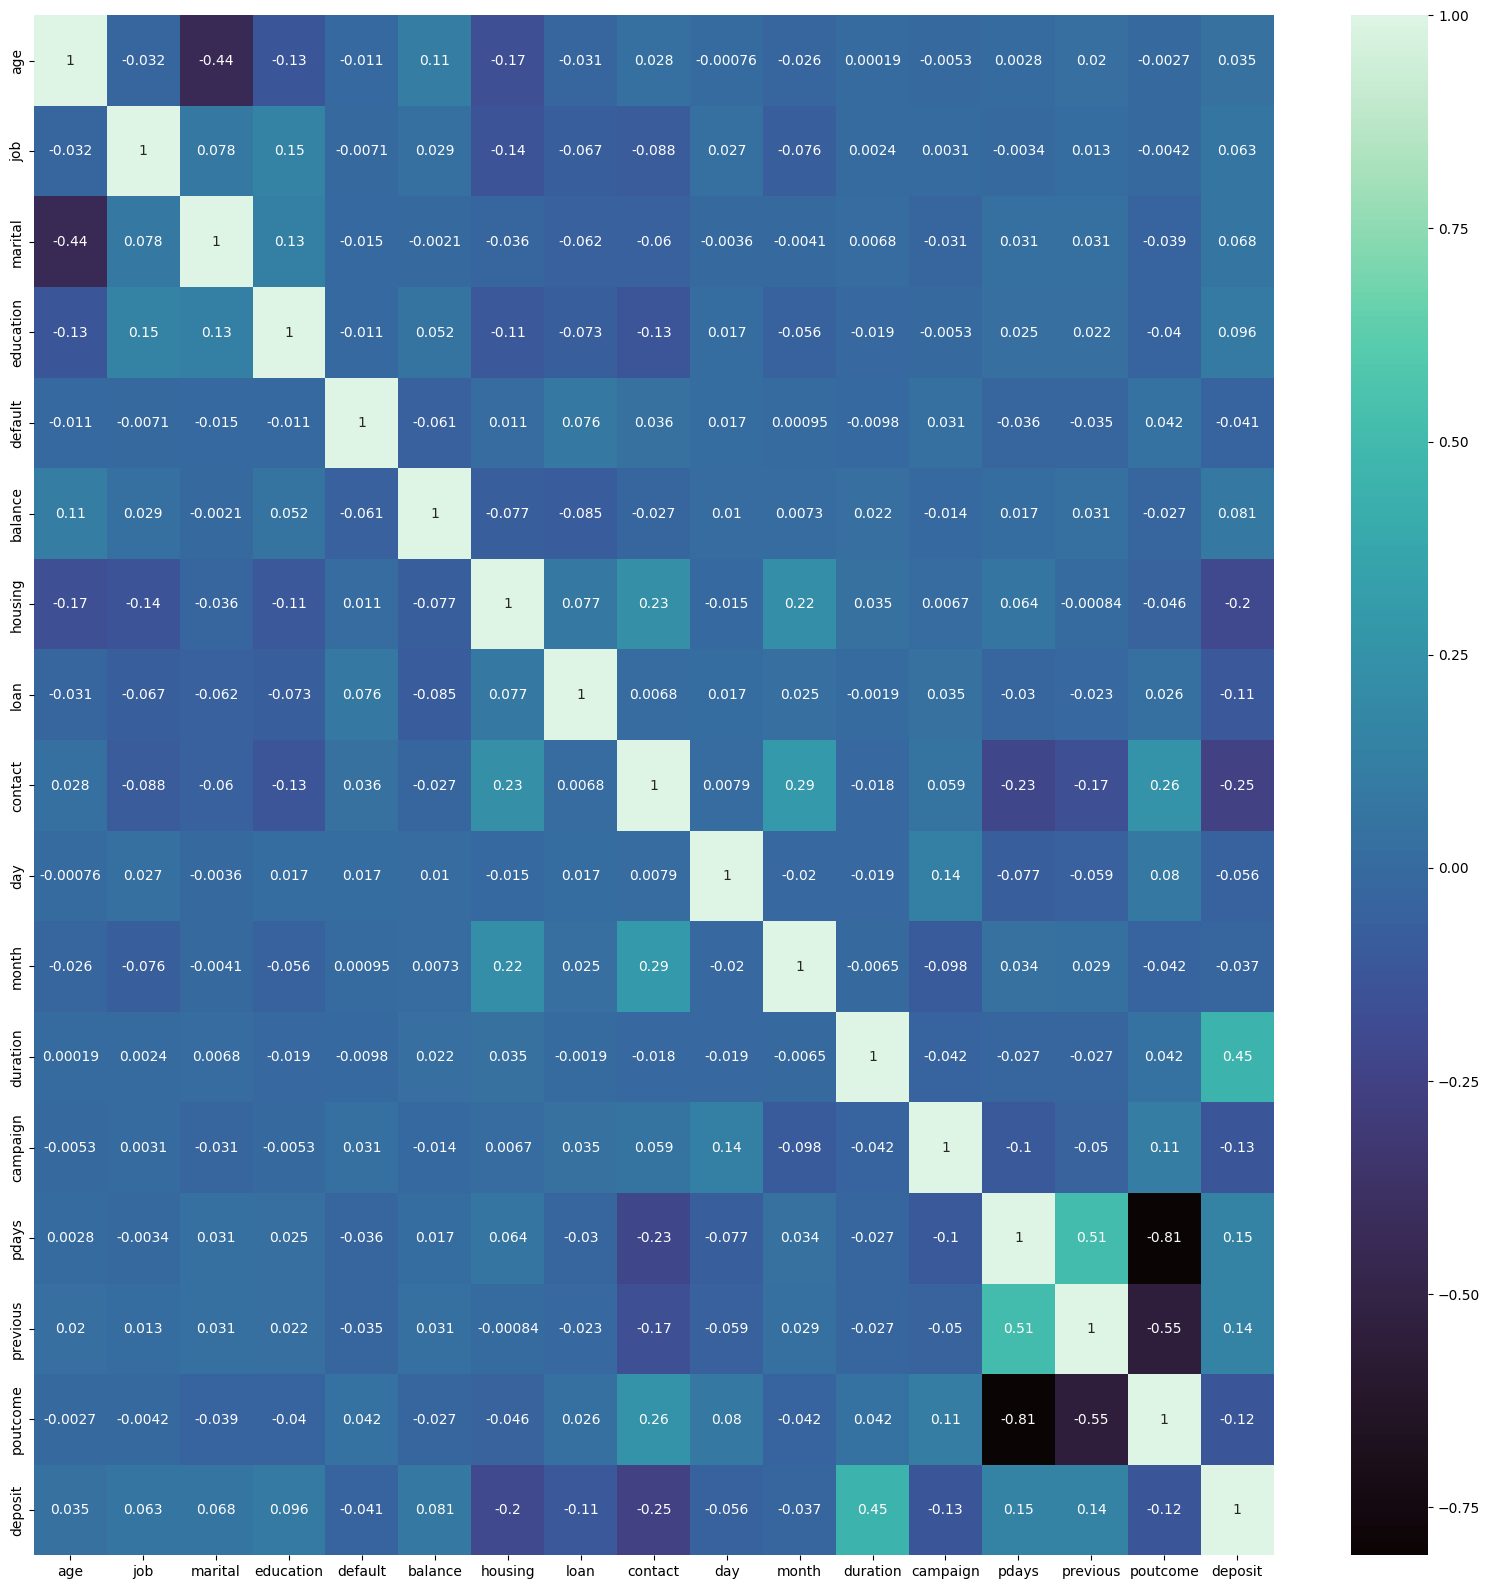

In [43]:
plt.figure(figsize=(20,20)),
sns.heatmap(df2.corr(), annot=True, cmap = "mako")

In [44]:
import pandas as pd

# Assuming df is your DataFrame
# numeric_df contains only the numerical variables
numeric_df = df4.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)


               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112283 -0.000902  0.000103 -0.007133  0.003807  0.027017
balance   0.112283  1.000000  0.010436  0.022394 -0.017576  0.017743  0.034675
day      -0.000902  0.010436  1.000000 -0.018305  0.141239 -0.076642 -0.059206
duration  0.000103  0.022394 -0.018305  1.000000 -0.037598 -0.027293 -0.028792
campaign -0.007133 -0.017576  0.141239 -0.037598  1.000000 -0.105844 -0.056861
pdays     0.003807  0.017743 -0.076642 -0.027293 -0.105844  1.000000  0.525066
previous  0.027017  0.034675 -0.059206 -0.028792 -0.056861  0.525066  1.000000


# <span style="color:skyblue">Splitting the data into training data & Test data</span>

In [45]:
X = df2.drop(['deposit'],axis=1)
Y = df2['deposit']
X_train,X_test,Y_train,Y_test = train_test_split(X , Y, test_size=0.2, random_state=42)


In [46]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3955,-1.110730,8,2,2,0,1.306081,0,0,0,-0.671947,11,1.930226,0.915364,1.367034,0.945695,0
11150,-0.607072,4,1,1,0,-0.363858,0,0,0,0.634410,1,-0.167075,0.180598,-0.481184,-0.363260,3
5173,0.568131,10,0,1,0,-0.411606,0,0,0,-0.671947,9,0.639579,-0.554168,0.364766,0.073059,2
3017,0.987846,2,1,2,0,0.134085,0,0,0,-0.078148,2,-0.060481,-0.554168,-0.481184,-0.363260,3
2910,0.987846,4,1,2,0,0.029598,0,0,0,-0.553187,9,-0.593449,0.180598,0.419937,2.690969,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.484188,4,1,2,0,-0.237977,1,0,0,-0.553187,5,-0.841207,-0.186785,-0.481184,-0.363260,3
5191,-1.110730,6,2,2,0,-0.424628,0,0,0,0.040612,9,0.221848,-0.186785,-0.168550,1.382014,2
5390,-0.523129,9,1,1,0,-0.119227,0,0,0,0.515650,1,-0.504141,3.854427,-0.481184,-0.363260,3
860,0.819960,5,1,2,0,-0.242627,0,0,0,1.109449,1,0.000018,0.915364,-0.481184,-0.363260,3


In [47]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5527,1.995163,5,0,1,0,-0.243247,0,0,0,-1.265746,5,-0.547355,-0.554168,-0.481184,-0.363260,3
4541,-0.271300,1,1,1,0,0.030528,0,0,2,0.040612,6,2.739761,2.384895,-0.481184,-0.363260,3
1964,-0.523129,1,2,1,0,1.064861,1,0,0,-0.196908,8,0.242014,-0.554168,2.286545,0.073059,0
5007,0.484188,1,1,1,0,2.077489,0,0,0,-0.909466,1,1.186952,-0.186785,-0.481184,-0.363260,3
8928,-0.523129,9,1,2,0,-0.017220,1,0,2,-0.434427,8,-0.829684,0.180598,-0.481184,-0.363260,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.400245,10,1,1,0,-0.186818,0,0,0,-1.028226,5,0.037470,0.915364,-0.481184,-0.363260,3
5544,0.652074,9,1,0,0,-0.402614,1,0,2,-0.909466,8,-0.795113,-0.554168,-0.481184,-0.363260,3
10749,0.987846,9,1,2,0,-0.340294,1,0,0,-1.265746,8,-0.913230,-0.554168,2.544008,0.073059,0
3881,0.568131,10,1,1,0,-0.186818,0,0,0,-0.434427,1,0.380298,-0.186785,1.164741,3.999924,2


In [48]:
len(X_train)

8929

In [49]:
len(X_test)

2233

# <span style="color:skyblue">Model Building : ANN </span>

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [51]:

num_features = X_train.shape[1]
print(num_features)

model = models.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),  
    layers.Dense(1, activation='sigmoid')
])


16


In [52]:
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks=[early_stopping])


Epoch 1/100
280/280 [==============================] - 3s 8ms/step - loss: 0.5824 - accuracy: 0.6818 - val_loss: 0.4538 - val_accuracy: 0.7953
Epoch 2/100
280/280 [==============================] - 2s 6ms/step - loss: 0.4778 - accuracy: 0.7784 - val_loss: 0.4509 - val_accuracy: 0.7909
Epoch 3/100
280/280 [==============================] - 2s 7ms/step - loss: 0.4561 - accuracy: 0.7946 - val_loss: 0.4291 - val_accuracy: 0.8030
Epoch 4/100
280/280 [==============================] - 2s 7ms/step - loss: 0.4438 - accuracy: 0.7992 - val_loss: 0.4229 - val_accuracy: 0.8021
Epoch 5/100
280/280 [==============================] - 2s 7ms/step - loss: 0.4397 - accuracy: 0.8034 - val_loss: 0.4247 - val_accuracy: 0.8030
Epoch 6/100
280/280 [==============================] - 2s 7ms/step - loss: 0.4358 - accuracy: 0.8050 - val_loss: 0.4228 - val_accuracy: 0.8061
Epoch 7/100
280/280 [==============================] - 2s 7ms/step - loss: 0.4307 - accuracy: 0.8077 - val_loss: 0.4149 - val_accuracy: 0.8079

In [54]:
model.predict(X_test)


70/70 [==============================] - 1s 3ms/step


array([[0.70139295],
       [0.8698807 ],
       [0.6377909 ],
       ...,
       [0.05619304],
       [0.9920698 ],
       [0.18843538]], dtype=float32)

In [55]:
val_loss, val_acc = model.evaluate(X_test, Y_test)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)


70/70 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.8240
Validation Loss: 0.40058115124702454
Validation Accuracy: 0.8240035772323608


# <span style="color:skyblue">Loss Curve</span>

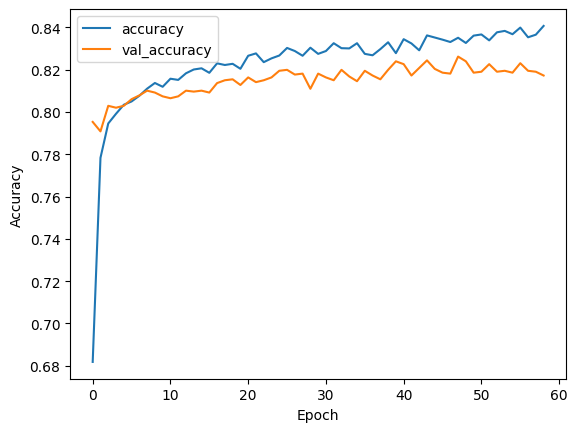

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [57]:
Y_pred = np.round(model.predict(X_test)).astype(int)
Y_pred


70/70 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

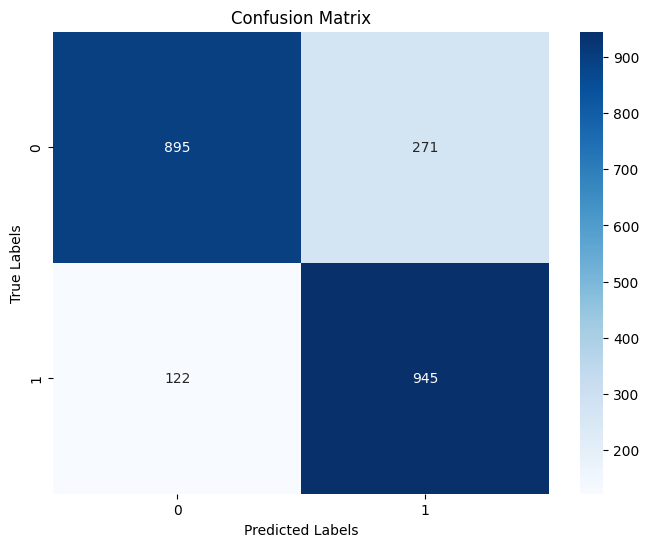

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# <span style="color:skyblue">Model Building : DT </span>

In [59]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [60]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value
        

In [61]:
class DecisionTree():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
            

In [62]:

X = df2.iloc[:, :-1].values
Y = df2.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)


In [63]:
classifier = DecisionTree(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()


X_11 <= -0.47821284950728504 ? 0.09755390102464057
 left:X_13 <= -0.38923291431958446 ? 0.03064755005972486
  left:X_10 <= 9.0 ? 0.019693186541064583
    left:X_10 <= 0.0 ? 0.01659766598209192
        left:1.0
        right:0.0
    right:X_11 <= -0.8527308349846032 ? 0.10852236925015757
        left:0.0
        right:1.0
  right:X_15 <= 1.0 ? 0.12098559895810213
    left:X_11 <= -0.714447271116055 ? 0.057720309282821014
        left:0.0
        right:0.0
    right:X_11 <= -0.6885191028907022 ? 0.043586637509985926
        left:1.0
        right:1.0
 right:X_11 <= 0.28810856693091985 ? 0.04135480739866454
  left:X_8 <= 1.0 ? 0.07875896412377947
    left:X_6 <= 0.0 ? 0.03654378476405429
        left:1.0
        right:0.0
    right:X_10 <= 8.0 ? 0.03716847777024379
        left:0.0
        right:1.0
  right:X_11 <= 0.8700518982110603 ? 0.008373911947749502
    left:X_8 <= 1.0 ? 0.014870052791638277
        left:1.0
        right:1.0
    right:X_11 <= 1.3626870944927634 ? 0.002173444365789

In [64]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)


0.7917599641737573

In [65]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_split': list(range(2, 100)), 'max_depth': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, Y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             verbose=1)

In [66]:
grid_search_cv.best_estimator_


DecisionTreeClassifier(max_depth=4, random_state=42)

In [67]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(Y_test, y_pred)


0.7917599641737573

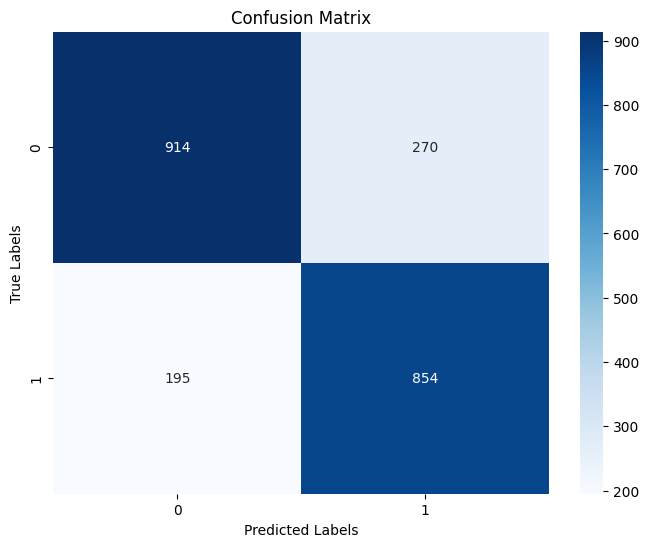

In [68]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1184
           1       0.76      0.81      0.79      1049

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



# <span style="color:skyblue"> GUI : ANN & DT </span>

# # Data description

# ..................

Input variables:
   # bank client data:
   1 - age (numeric) 
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")

# .........................

   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)

# ......................
  
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  
# .....................
  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

  # ......................................................

In [70]:
#libraries
import tkinter as tk
from tkinter import  *
from tkinter import messagebox  
import joblib
import traceback
import warnings


In [71]:
#list of (categorical: encoded )
categorical_options = {
    'job': {'admin.': 0, 'technician': 9, 'services': 7, 'management': 4, 'retired': 5,
            'blue-collar': 1, 'unemployed': 10, 'entrepreneur': 2, 'housemaid': 3,
            'unknown': 11, 'self-employed': 6, 'student': 8},
    'marital': {'married': 1, 'single': 2, 'divorced': 0},
    'education': {'secondary': 1, 'tertiary': 2, 'primary': 0, 'unknown': 3},
    'default': {'no': 0, 'yes': 1},
    'housing': {'yes': 1, 'no': 0},
    'loan': {'no': 0, 'yes': 1},
    'contact': {'unknown': 2, 'cellular': 0, 'telephone': 1},
    'month': {'may': 8, 'jun': 6, 'jul': 5, 'aug': 1, 'oct': 10, 'nov': 9,
              'dec': 2, 'jan': 4, 'feb': 3, 'mar': 7, 'apr': 0, 'sep': 11},
    'poutcome': {'unknown': 3, 'other': 1, 'failure': 0, 'success': 2}
}


In [72]:
#ignore user_wrning from scaler
warnings.filterwarnings("ignore", category=UserWarning)


In [73]:
#put trained SVM model to joblib 
joblib.dump(model,"ANN_model.joblib")

#put trained DT model to joblib 
joblib.dump(classifier,"DT_model.joblib")


['DT_model.joblib']

In [74]:
#load the trained ANN model
#check if the model loaded successfully
try:
    ANN_model = joblib.load('ANN_model.joblib')
    print("model loaded successfully")
except Exception as e:
    print("error loading the model: ", str(e)) 


model loaded successfully


In [75]:
#load the trained DT model
#check if the model loaded successfully
try:
    DT_model = joblib.load('DT_model.joblib')
    print("model loaded successfully")
except Exception as e:
    print("error loading the model: ", str(e)) 


model loaded successfully


In [76]:
#initialize & add title
root = tk.Tk()
root.title("ANN & DT Classification GUI")


''

In [77]:
#define window dimensions to fill 75% of the screen
window_width = int(root.winfo_screenwidth() * 0.75)
window_height = int(root.winfo_screenheight() * 0.75)

#center the window
x_position = (root.winfo_screenwidth() - window_width) // 2
y_position = (root.winfo_screenheight() - window_height) // 2


root.geometry(f"{window_width}x{window_height}+{x_position}+{y_position}")
root.config(bg="lightblue")  #background color
root.resizable(False, False) #fixed


''

In [78]:
#create Frame to hold inputs
input_frame = Frame(root, bg="lightblue", padx=20, pady=20)
input_frame.pack(fill=tk.BOTH, expand=True)


In [79]:
# GUI inputs
#header label
header = Label(input_frame, text="(Term Deposit Prediction)", font=("Arial", 20, "bold"),
               bg="lightblue", foreground="black")
header.grid(row=0, columnspan=2)  # Span across columns

#labels and dropdown menus for categorical inputs
dropdown_menus = []
for idx, (col, options) in enumerate(categorical_options.items(), start=1):
    label = Label(input_frame, text=f"{col.capitalize()}:", bg="lightblue", foreground="black",
                  font=("Arial", 15, "bold"))
    label.grid(row=idx, column=0, padx=10, pady=5)

    #default value based on the first item in options
    default_value = list(options.keys())[0]  #options is a dictionary
    dropdown = StringVar(root)
    dropdown.set(default_value)  
    dropdown_menu = OptionMenu(input_frame, dropdown, *options.keys())
    dropdown_menu.config(bg="gray", fg="white", font=("Arial", 15, "bold"))
    dropdown_menu["menu"].config(bg="lightblue", fg="black", font=("Arial", 15, "bold"))
    dropdown_menu.grid(row=idx, column=1, padx=10, pady=5)
    dropdown_menus.append(dropdown)

#labels and entry for numerical inputs
numerical_labels = ["Age:", "Balance:", "Day:", "Duration:", "Campaign:", "Pdays:", "Previous:"]
numerical_entries = []  
for idx, label_text in enumerate(numerical_labels, start=1):
    label = Label(input_frame, text=label_text, bg="lightblue", foreground="black",
                  font=("Arial", 15, "bold"))
    label.grid(row=idx, column=2, padx=10, pady=5)  

    entry = Entry(input_frame, width=10, font=("Arial", 14), bg="gray", fg="white", borderwidth=3)
    entry.grid(row=idx, column=3, padx=10, pady=5)  
    numerical_entries.append(entry)


In [80]:
#function to make predictions
def predict(model_type):
    try:
        #check if models are loaded
        if model_type not in ['ANN', 'DT']:
            raise ValueError("Invalid model_type specified.")

        #get numerical&categorical inputs
        numerical_inputs = [int(entry.get()) for entry in numerical_entries]
        categorical_inputs = [categorical_options[col][dropdown_menus[i].get()] 
                              for i, col in enumerate(categorical_options)]
        #checking numerical inputs -> int
        if not all(isinstance(num, int) for num in numerical_inputs):
            raise ValueError("Numerical inputs must be integers.")
         
        #print encoded categorical_inputs
        print("Input encoded categorical:", categorical_inputs)
        #print numerical before scaling
        print("Input numerical before scaling:", numerical_inputs)


        # Scale numerical variables
        scaled_numerical = scaler.transform([numerical_inputs])
        
        # Print scaled numerical
        print("Input scaled numerical:", scaled_numerical)

        # Data in order 
        age = scaled_numerical[0][0]
        jop = categorical_inputs[0]
        marital = categorical_inputs[1]
        education = categorical_inputs[2]
        default = categorical_inputs[3]
        balance = scaled_numerical[0][1]
        housing = categorical_inputs[4]
        loan = categorical_inputs[5]
        contact = categorical_inputs[6]
        day = scaled_numerical[0][2]
        month = categorical_inputs[7]
        duration = scaled_numerical[0][3]
        campaign = scaled_numerical[0][4]
        pdays = scaled_numerical[0][5]
        previous = scaled_numerical[0][6]
        poutcome = categorical_inputs[8]

        inputs = [age, jop, marital, education, default, balance, housing,
                  loan, contact, day, month, duration, campaign, pdays, previous, poutcome]

        print("Inputs after scaling & encoding :", inputs)
        
        
        # Make prediction
        if model_type == 'ANN':
            prediction = ANN_model.predict([inputs])
            #print the predicted output 
            print("Predicted output:", prediction)
            print("Prediction shape:", prediction.shape)
            print("...........................")
            
        else: #model_type == 'DT'
            prediction = DT_model.predict([inputs])
            #print the predicted output
            print("Predicted output:", prediction)
            print("...........................")

  
        #prediction result 
        if model_type == 'ANN':
            if prediction[0][0] > 0.5:
                result_label1.config(text="Client will likely subscribe to a term deposit")
            else:
                result_label1.config(text="Client may not subscribe to a term deposit")
        else:# model_type == 'DT'
            if prediction[0] == 1:
                result_label2.config(text="Client will likely subscribe to a term deposit")
            else:
                result_label2.config(text="Client may not subscribe to a term deposit")
            
    except Exception as e:
        #dispaly error message in GUI
        messagebox.showerror("Error", f"An error occurred: {str(e)}")
        traceback.print_exc() #print error traceback to console



In [81]:
#button to trigger ANN prediction
predict_button_ann = Button(input_frame, text="Predict ANN", bg="lightgreen", activebackground="blue",
                            borderwidth=3, font=("Arial", 11, "bold"), command=lambda: predict('ANN'))
predict_button_ann.grid(row=2, column=5, pady=10)

# Display ANN prediction result
result_label1 = Label(input_frame, text="ANN Prediction result will appear here....", bg="lightblue", fg="black",
                      font=("Arial", 15, "bold"))
result_label1.grid(row=1, column=5, pady=10)

# Button to trigger DT prediction
predict_button_dt = Button(input_frame, text="Predict DT", bg="lightgreen", activebackground="blue",
                           borderwidth=3, font=("Arial", 11, "bold"), command=lambda: predict('DT'))
predict_button_dt.grid(row=5, column=5, pady=10)

# Display DT prediction result
result_label2 = Label(input_frame, text="DT Prediction result will appear here....", bg="lightblue", fg="black",
                      font=("Arial", 15, "bold"))
result_label2.grid(row=4, column=5, pady=10)



In [82]:
root.mainloop() #start GUI


Input encoded categorical: [0, 1, 1, 0, 1, 0, 2, 8, 3]
Input numerical before scaling: [59, 2343, 5, 1042, 1, -1, 0]
Input scaled numerical: [[ 1.49150488  0.25252514 -1.26574556  1.93022589 -0.55416834 -0.48118405
  -0.36325984]]
Inputs after scaling & encoding : [1.491504880292054, 0, 1, 1, 0, 0.25252514336959164, 1, 0, 2, -1.2657455558897757, 8, 1.9302258878699303, -0.5541683439582251, -0.48118405401369996, -0.3632598446560345, 3]
1/1 [==============================] - 0s 59ms/step
Predicted output: [[0.930713]]
Prediction shape: (1, 1)
...........................
Input encoded categorical: [0, 1, 1, 0, 1, 0, 2, 8, 3]
Input numerical before scaling: [59, 2343, 5, 1042, 1, -1, 0]
Input scaled numerical: [[ 1.49150488  0.25252514 -1.26574556  1.93022589 -0.55416834 -0.48118405
  -0.36325984]]
Inputs after scaling & encoding : [1.491504880292054, 0, 1, 1, 0, 0.25252514336959164, 1, 0, 2, -1.2657455558897757, 8, 1.9302258878699303, -0.5541683439582251, -0.48118405401369996, -0.363259844